In [87]:
import glob
from PIL import Image

Data Collection

In [88]:
airplane = glob.glob("airplane/*png")
automobile = glob.glob("automobile/*png")
bird = glob.glob("bird/*png")   
cat = glob.glob("cat/*png")
deer = glob.glob("deer/*png")
dog = glob.glob("dog/*png")
frog = glob.glob("frog/*png")
horse = glob.glob("horse/*png")
ship = glob.glob("ship/*png")
truck = glob.glob("truck/*png")

In [89]:
print(len(airplane))
print(len(automobile))
print(len(bird))
print(len(cat))
print(len(deer))
print(len(dog))
print(len(frog))
print(len(horse))
print(len(ship))
print(len(truck))

5000
5000
5000
5000
5000
5000
5000
5000
5000
5000


In [37]:
######################################################################################

Data Cleaning

In [90]:

img = Image.open(airplane[2])

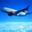

In [91]:
img

Converted to Grey Scale RGB has 3 filters but Grey Scale has 1 filter

In [92]:
img = img.convert('L')

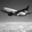

In [93]:
img

convert greay scale to array

In [94]:
import numpy as np

In [95]:
pixels = np.array(img)

In [96]:
type(pixels)

numpy.ndarray

In [97]:
pixels.shape

(32, 32)

In [98]:
pixels

array([[ 49,  50,  51, ...,  62,  61,  61],
       [ 49,  50,  52, ...,  64,  63,  62],
       [ 52,  53,  54, ...,  67,  66,  65],
       ...,
       [179, 180, 176, ..., 198, 186, 181],
       [176, 184, 173, ..., 170, 165, 158],
       [164, 168, 168, ..., 154, 152, 151]], dtype=uint8)

darker area shows low value and lighter area shows higher values

In [46]:
#########################################################################################

Classification Models

In [99]:
data = []
labels = []

Need to flatten to array for 3d to 1d convert for model training

In [100]:
# airplane images
for img_path in airplane:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(0)  # Label for airplane class



In [101]:
#automobile images
for img_path in automobile:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(1)  # Label for automobile class

In [102]:
#bird images
for img_path in bird:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(2)  # Label for bird class

In [103]:
#cat images
for img_path in cat:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(3)  # Label for cat class

In [104]:
#deer images
for img_path in deer:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(4)  # Label for deer class

In [105]:
#dog images
for img_path in dog:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(5)  # Label for dog class

In [106]:
#frog images
for img_path in frog:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(6)  # Label for frog class

In [107]:
#horse images
for img_path in horse:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(7)  # Label for horse class

In [108]:
#ship images
for img_path in ship:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(8)  # Label for ship class

In [109]:
#truck images
for img_path in truck:
    img = Image.open(img_path).convert('L')
    img = img.resize((32, 32))  # Resize for consistency, if needed
    pixels = np.array(img).flatten()
    data.append(pixels)
    labels.append(9)  # Label for truck class

In [58]:
#################################################################################

In [59]:
len(data), len(labels)

(50000, 50000)

Prepare for Model Training

In [110]:
x = np.array(data)
y = np.array(labels)

Scaling

## Visualize Pixel Value Distribution Before Scaling
Let's plot a histogram to see the distribution of pixel values before applying any scaling. This helps understand the need for scaling.

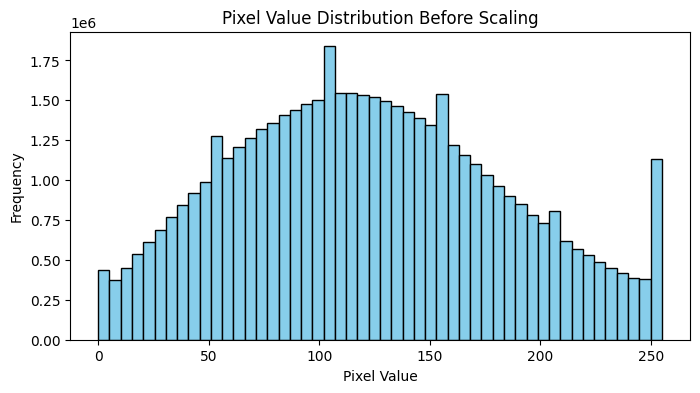

In [61]:
import matplotlib.pyplot as plt

# Concatenate all pixel values into a single array for visualization
all_pixels = np.concatenate(data)
plt.figure(figsize=(8,4))
plt.hist(all_pixels, bins=50, color='skyblue', edgecolor='black')
plt.title('Pixel Value Distribution Before Scaling')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()

### Why MinMaxScaler for Image Classification in ML?
MinMaxScaler is commonly used for image data in machine learning because it scales pixel values (usually 0-255) to a fixed range (typically 0-1). This helps many ML algorithms (like SVM, k-NN, logistic regression) perform better, as features are on the same scale and gradients are more stable.

In [65]:
################################################################################

### What Happens After Using StandardScaler?
StandardScaler standardizes features by removing the mean and scaling to unit variance. After scaling, the pixel values will have a mean close to 0 and a standard deviation close to 1. The distribution will be centered around 0, but the shape will remain similar to the original.

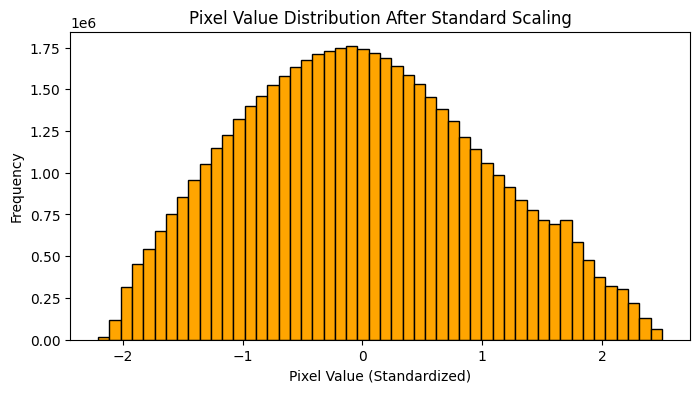

In [64]:
from sklearn.preprocessing import StandardScaler

scaler_std = StandardScaler()
x_std_scaled = scaler_std.fit_transform(x)

# Visualize pixel value distribution after StandardScaler
all_pixels_std_scaled = x_std_scaled.flatten()
plt.figure(figsize=(8,4))
plt.hist(all_pixels_std_scaled, bins=50, color='orange', edgecolor='black')
plt.title('Pixel Value Distribution After Standard Scaling')
plt.xlabel('Pixel Value (Standardized)')
plt.ylabel('Frequency')
plt.show()

Save scaling model

In [66]:
import joblib

# Save the fitted scaler to a file
joblib.dump(scaler_std, 'standard_scaler_model.pkl')

['standard_scaler_model.pkl']

In [67]:
#########################################################################################

Machine Learning

i) Train Test Split

In [68]:
from sklearn.model_selection import train_test_split

# Use standardized data for ML
X_train, X_test, y_train, y_test = train_test_split(x_std_scaled, y, test_size=0.2, random_state=42)

print('Train shape:', X_train.shape, y_train.shape)
print('Test shape:', X_test.shape, y_test.shape)

Train shape: (40000, 1024) (40000,)
Test shape: (10000, 1024) (10000,)


1024 mean by 32 x 32 pixel

This is multi class classification model am selecting Random Forest Ensamble method is type of multiple decision tress, Its Manage Noise  Data

In [69]:
# Train a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize and train the model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_clf.predict(X_test)

Evaluation the Model

In [70]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Test Accuracy: {accuracy:.4f}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Random Forest Test Accuracy: 0.3977
Classification Report:
              precision    recall  f1-score   support

           1       0.43      0.39      0.41      1009
           2       0.44      0.46      0.45      1034
           3       0.35      0.34      0.34       985
           4       0.31      0.24      0.27      1008
           5       0.31      0.35      0.33       986
           6       0.39      0.32      0.35      1030
           7       0.40      0.42      0.41      1021
           8       0.43      0.41      0.42       977
           9       0.46      0.54      0.50       955
          10       0.43      0.51      0.47       995

    accuracy                           0.40     10000
   macro avg       0.39      0.40      0.39     10000
weighted avg       0.39      0.40      0.39     10000



In [73]:
#############################################################################

Almost Class is Balanced

############################################################################

Try Hyperparameter tuning

Using Grid Search CV For Random Forest and Cross Validation For 3 folds

## Hyperparameter Tuning with GridSearchCV
Let's use GridSearchCV to find the best hyperparameters for the Random Forest model.

In [75]:
 from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
grid_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(rf, grid_params, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Best Parameters:', grid_search.best_params_)
print('Best Cross-Validation Accuracy:', grid_search.best_score_)

# Evaluate on test set with best estimator
y_pred_gs = grid_search.best_estimator_.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print('Test Accuracy (GridSearchCV):', accuracy_score(y_test, y_pred_gs))
print('Classification Report (GridSearchCV):')
print(classification_report(y_test, y_pred_gs))

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Cross-Validation Accuracy: 0.41192486989315874
Test Accuracy (GridSearchCV): 0.4025
Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           1       0.45      0.38      0.41      1009
           2       0.45      0.45      0.45      1034
           3       0.36      0.33      0.34       985
           4       0.33      0.23      0.27      1008
           5       0.32      0.35      0.33       986
           6       0.38      0.32      0.35      1030
           7       0.40      0.45      0.42      1021
           8       0.44      0.44      0.44       977
           9       0.44      0.55      0.49       955
          10       0.43      0.54      0.48       995

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.40     10000
wei

No Major Changes happens after Using Hyperparameter Tuning

In [76]:
############################################################################

So Now Try Another Ensemble Method like XG Boosting

## XGBoost Classifier
Let's try another ensemble method: XGBoost, which is often effective for structured/tabular data.

But No Changes

In [79]:
#################################################################################

Now Try Deep Learning Technique

Multiconnect Neural Network

CNN - Convolution Neural Network

Working of Convolution Layer + Relu , Pooling Layer , Fully Flatten Layer ( Convert Multi Dimension to 1 Dimension)

Convolution Layers take 

1) Loopy Pattern
2) Vertical Line
3) Diagonal Line

More Hidden Layers Can Analyse Image Deeply

In [80]:
#################################################################################

cnn - convolution neural network

# Step-by-Step CNN with PyTorch
This section demonstrates how to build, train, and evaluate a simple Convolutional Neural Network (CNN) for image classification using PyTorch.

In [111]:
# 1. Import Required Libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

In [112]:
# 2. Prepare Data for PyTorch (reshape and convert to tensors)
# Reshape to (num_samples, 1, 32, 32) for grayscale images
X = np.array(data).reshape(-1, 1, 32, 32).astype(np.float32)
y = np.array(labels).astype(np.int64)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
torch_X_train = torch.tensor(X_train)
torch_y_train = torch.tensor(y_train)
torch_X_test = torch.tensor(X_test)
torch_y_test = torch.tensor(y_test)

# Create DataLoader
train_dataset = TensorDataset(torch_X_train, torch_y_train)
test_dataset = TensorDataset(torch_X_test, torch_y_test)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Explanation:

X = np.array(data).reshape(-1, 1, 32, 32).astype(np.float32)

Converts your list of image data (data) into a NumPy array.

.reshape(-1, 1, 32, 32) changes the shape to (number of samples, 1, 32, 32):

-1 lets NumPy automatically determine the number of samples.

1 is the number of channels (for grayscale images).

32, 32 is the image height and width.

.astype(np.float32) ensures the data type is 32-bit float, which is required for most deep learning frameworks like PyTorch.

y = np.array(labels).astype(np.int64)

Converts your list of labels (labels) into a NumPy array.

.astype(np.int64) ensures the labels are 64-bit integers, which is the standard type for class labels in PyTorch.

Summary:

These lines prepare your image data and labels in the correct format and data type for training a convolutional neural network (CNN) using PyTorch.

#########################################################################################

kernel_size=3 means each filter is a 3x3 window.

Kernel size = size of the filter (e.g., 3x3 pixels)

The number of output channels (e.g., 16) means you get 16 feature maps, one for each filter.

##########################################################################################

In [120]:
# 3. Define the CNN Model
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(16)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(32)
        self.fc1 = nn.Linear(32 * 8 * 8, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 classes
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.25)
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = x.view(-1, 32 * 8 * 8)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

1. Batch normalization is a technique used in deep learning to make training faster and more stable. Here’s what it does:

Normalizes the output of a layer (like a convolutional layer) so that the mean is close to 0 and the standard deviation is close to 1, for each mini-batch during training.

Reduces internal covariate shift, which means it helps keep the distribution of activations more consistent as the network trains.

Allows higher learning rates and can speed up convergence.

Acts as a regularizer, sometimes reducing the need for dropout.

In your CNN, batch normalization is applied after each convolutional layer. This helps the network learn better and can improve both training speed and final accuracy.

#######################################################################################

<VSCode.Cell language="markdown">
### Explanation: SimpleCNN Model Definition

This code defines a simple Convolutional Neural Network (CNN) for image classification using PyTorch. Here’s what each part does:

- `class SimpleCNN(nn.Module)`: Defines a new neural network class that inherits from PyTorch's base `nn.Module`.
- `__init__`: The constructor sets up the layers:
  - `self.conv1`: 2D convolutional layer with 1 input channel (grayscale), 16 output channels, 3x3 kernel, and padding=1.
  - `self.bn1`: Batch normalization layer for the first convolutional layer.
  - `self.pool`: Max pooling layer with 2x2 window, reduces spatial size by half.
  - `self.conv2`: Second convolutional layer, takes 16 input channels, outputs 32, 3x3 kernel, padding=1.
  - `self.bn2`: Batch normalization layer for the second convolutional layer.
  - `self.fc1`: Fully connected (dense) layer, input size is 32*8*8 (after two poolings on 32x32 input), output size is 128.
  - `self.fc2`: Output layer, 128 inputs to 10 outputs (for 10 classes).
  - `self.relu`: ReLU activation function.
  - `self.dropout`: Dropout layer for regularization (25% dropout rate).

- `forward(self, x)`: Defines the forward pass (how data flows through the network):
  1. Pass input through first conv layer, apply ReLU and batch normalization.
  2. Apply max pooling.
  3. Pass through second conv layer, apply ReLU and batch normalization.
  4. Apply max pooling again.
  5. Flatten the output to a vector.
  6. Pass through first fully connected layer, apply ReLU and dropout.
  7. Pass through output layer to get class scores.

This architecture is suitable for small grayscale images (like 32x32) and is a common starting point for image classification tasks.

########################################################################################

** 2D convolutional layer with 1 input channel (grayscale), 16 output channels, 3x3 kernel, and padding=1.

Yes, that's correct! In a 2D convolutional layer like nn.Conv2d(1, 16, kernel_size=3, padding=1), the 16 output channels mean the layer uses 16 different filters (also called kernels).

Each filter learns to detect a different feature or pattern in the input image, such as:

Loopy or circular shapes

Vertical lines

Horizontal lines

Diagonal lines

Edges, corners, or other textures

After the convolution, you get 16 separate "feature maps" (one for each filter), which can be visualized as 16 different 2D arrays (or "boxes") showing where each filter detected its pattern in the image. These feature maps are then passed to the next layer for further processing.

So, your understanding is correct: 16 output channels = 16 filters, each learning to detect different visual features!

#####################################################################

In [121]:
# 4. Instantiate Model, Loss Function, and Optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

### Training with Early Stopping
This cell adds early stopping to the CNN training loop. Training will stop if the validation loss does not improve for a set number of epochs (patience).

In [122]:
# 5. Train the CNN with Early Stopping
num_epochs = 50
patience = 5  # Number of epochs to wait for improvement
best_val_loss = float('inf')
patience_counter = 0

# Split a validation set from the training data
from torch.utils.data import random_split
val_size = int(0.1 * len(train_dataset))
train_size = len(train_dataset) - val_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])
train_loader_es = DataLoader(train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader_es:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(train_loader_es.dataset)

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping check
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1/50, Train Loss: 1.5927, Val Loss: 1.2759
Epoch 2/50, Train Loss: 1.2492, Val Loss: 1.1152
Epoch 2/50, Train Loss: 1.2492, Val Loss: 1.1152
Epoch 3/50, Train Loss: 1.1485, Val Loss: 1.0988
Epoch 3/50, Train Loss: 1.1485, Val Loss: 1.0988
Epoch 4/50, Train Loss: 1.0752, Val Loss: 1.1495
Epoch 4/50, Train Loss: 1.0752, Val Loss: 1.1495
Epoch 5/50, Train Loss: 1.0194, Val Loss: 1.0524
Epoch 5/50, Train Loss: 1.0194, Val Loss: 1.0524
Epoch 6/50, Train Loss: 0.9775, Val Loss: 1.0455
Epoch 6/50, Train Loss: 0.9775, Val Loss: 1.0455
Epoch 7/50, Train Loss: 0.9418, Val Loss: 1.0461
Epoch 7/50, Train Loss: 0.9418, Val Loss: 1.0461
Epoch 8/50, Train Loss: 0.9013, Val Loss: 0.9553
Epoch 8/50, Train Loss: 0.9013, Val Loss: 0.9553
Epoch 9/50, Train Loss: 0.8673, Val Loss: 0.9656
Epoch 9/50, Train Loss: 0.8673, Val Loss: 0.9656
Epoch 10/50, Train Loss: 0.8401, Val Loss: 1.0796
Epoch 10/50, Train Loss: 0.8401, Val Loss: 1.0796
Epoch 11/50, Train Loss: 0.8141, Val Loss: 0.9935
Epoch 11/50, Trai

In [123]:
# 6. Evaluate the CNN
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.6613


###########################################################################

Little Bit Accuracy Increased after Using Batch Normalization

##########################################################################################

##How to Increase CNN Test Accuracy##


1. Data Augmentation

Add random transformations (rotation, flip, crop, etc.) to your training images to help the model generalize better.

2. Increase Model Complexity

Add more convolutional layers, increase the number of filters, or add more neurons to fully connected layers.

3. Train for More Epochs

If you are not overfitting, try increasing the number of epochs or patience for early stopping.

4. Tune Learning Rate

Try different learning rates (e.g., 0.0005, 0.0001) for the optimizer.

5. Batch Normalization

Add batch normalization layers after convolutions to stabilize and speed up training.

6. Regularization

Adjust dropout rate (e.g., 0.3 or 0.4) or add L2 regularization to the optimizer.

7. Use Pretrained Models

For small datasets, try transfer learning with a pretrained model (e.g., ResNet, VGG) using PyTorch’s torchvision.

8. Check Data Quality

Ensure your images and labels are correct and balanced across classes.

9. Hyperparameter Tuning

Experiment with batch size, optimizer type (SGD, RMSprop), and network architecture.

You can further add confusion matrix, class-wise accuracy, or visualize predictions as needed.

###################################################################################

### Data Augmentation for Improved Generalization
Let's use torchvision transforms to apply data augmentation to the training images. This can help the model generalize better and improve accuracy.

In [124]:
from torchvision import transforms
from torch.utils.data import Dataset

# Define augmentation transforms for training data
train_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor()
])

# No augmentation for test/validation data, just convert to tensor
val_test_transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor()
])

# Custom Dataset to apply transforms
class AugmentedDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    def __len__(self):
        return len(self.images)
    def __getitem__(self, idx):
        image = self.images[idx][0]  # shape: (1, 32, 32)
        image = image.squeeze(0)     # shape: (32, 32)
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        else:
            image = torch.tensor(image, dtype=torch.float32).unsqueeze(0)
        return image, label

# Create datasets with augmentation for training
aug_train_dataset = AugmentedDataset(torch_X_train, torch_y_train, transform=train_transform)
aug_val_dataset = AugmentedDataset(torch_X_test, torch_y_test, transform=val_test_transform)

aug_train_loader = DataLoader(aug_train_dataset, batch_size=64, shuffle=True)
aug_val_loader = DataLoader(aug_val_dataset, batch_size=64, shuffle=False)

Now, use `aug_train_loader` and `aug_val_loader` in your training and evaluation loops instead of the original loaders to benefit from data augmentation.

Data augmentation has been added using torchvision transforms and a custom Dataset. Use aug_train_loader and aug_val_loader in your training and evaluation loops to benefit from random flips, rotations, and crops. This should help your model generalize better and further improve accuracy. Let me know if you want the training loop updated to use these new loaders!

In [126]:
# Evaluate the CNN on augmented validation/test data
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in aug_val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f"Test Accuracy with Data Augmentation: {accuracy:.4f}")

Test Accuracy with Data Augmentation: 0.1008


###############################################################################

After Using Data Augmentation Accuracy was droped heavely

####################################################################################

Increase Model Complexity like add more hidden layers like add more convolution layers and neurons

################################################################

### Increasing Model Complexity: Deeper CNN
Let's increase the model complexity by adding more convolutional layers and filters to the CNN. This can help the model learn more complex features from the images.

In [130]:
# Define a deeper and wider CNN model
class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()
    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# Instantiate the new, more complex model
model = ComplexCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

The notebook now includes a deeper and wider CNN model (ComplexCNN) with more convolutional layers and filters. To continue, retrain your model using this new architecture and your augmented data loaders for best results. This increased complexity should help your model learn more advanced features and potentially

Now, retrain your model using the same training loop, but with the new ComplexCNN model. Use your augmented data loaders for best results.

### Training the Complex CNN Model (Epoch-based Training)
Train the deeper CNN model using the augmented training loader and monitor validation accuracy.

In [131]:
# 5. Train the CNN with Early Stopping
num_epochs = 50
patience = 5  # Number of epochs to wait for improvement
best_val_loss = float('inf')
patience_counter = 0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in aug_train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * images.size(0)
    epoch_loss = running_loss / len(aug_train_loader.dataset)

    # Validation loss
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for images, labels in aug_val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * images.size(0)
    val_loss /= len(aug_val_loader.dataset)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}")

    # Early stopping
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

Epoch 1/50, Train Loss: 1.8227, Val Loss: 1.4637
Epoch 2/50, Train Loss: 1.5256, Val Loss: 1.7097
Epoch 2/50, Train Loss: 1.5256, Val Loss: 1.7097
Epoch 3/50, Train Loss: 1.3833, Val Loss: 1.2336
Epoch 3/50, Train Loss: 1.3833, Val Loss: 1.2336
Epoch 4/50, Train Loss: 1.2973, Val Loss: 1.1794
Epoch 4/50, Train Loss: 1.2973, Val Loss: 1.1794
Epoch 5/50, Train Loss: 1.2345, Val Loss: 1.3788
Epoch 5/50, Train Loss: 1.2345, Val Loss: 1.3788
Epoch 6/50, Train Loss: 1.1845, Val Loss: 1.0087
Epoch 6/50, Train Loss: 1.1845, Val Loss: 1.0087
Epoch 7/50, Train Loss: 1.1388, Val Loss: 1.2623
Epoch 7/50, Train Loss: 1.1388, Val Loss: 1.2623
Epoch 8/50, Train Loss: 1.1083, Val Loss: 1.0010
Epoch 8/50, Train Loss: 1.1083, Val Loss: 1.0010
Epoch 9/50, Train Loss: 1.0848, Val Loss: 1.0678
Epoch 9/50, Train Loss: 1.0848, Val Loss: 1.0678
Epoch 10/50, Train Loss: 1.0647, Val Loss: 0.9225
Epoch 10/50, Train Loss: 1.0647, Val Loss: 0.9225
Epoch 11/50, Train Loss: 1.0353, Val Loss: 1.0251
Epoch 11/50, Trai

### Evaluate the Complex CNN Model
After training the deeper CNN, use this cell to evaluate its accuracy on the validation/test set.

In [132]:
# Evaluate the Complex CNN on the validation/test set
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for images, labels in aug_val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
accuracy = correct / total
print(f"Test Accuracy (Complex CNN): {accuracy:.4f}")

Test Accuracy (Complex CNN): 0.7380


### Save the Trained Complex CNN Model
You can save your trained PyTorch model using `torch.save`. This allows you to reload the model later for inference or further training.

In [133]:
import torch

# Save the entire model
torch.save(model, 'complex_cnn_model.pth')

# Or, save only the model parameters (recommended)
torch.save(model.state_dict(), 'complex_cnn_model_state_dict.pth')

print("Model saved as 'complex_cnn_model.pth' and 'complex_cnn_model_state_dict.pth'")

Model saved as 'complex_cnn_model.pth' and 'complex_cnn_model_state_dict.pth'


- Use `torch.save(model, ...)` to save the whole model (architecture + weights).
- Use `torch.save(model.state_dict(), ...)` to save only the weights (recommended for most use cases).
- To load the model later, use `torch.load` and `model.load_state_dict`.

### Classification Report and Confusion Matrix for Complex CNN
Generate a detailed classification report and confusion matrix to evaluate the model's performance on each class.

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.67      0.75      1009
           1       0.90      0.88      0.89      1034
           2       0.63      0.61      0.62       985
           3       0.60      0.55      0.57      1008
           4       0.54      0.84      0.66       986
           5       0.79      0.55      0.65      1030
           6       0.87      0.71      0.78      1021
           7       0.69      0.85      0.76       977
           8       0.89      0.82      0.85       955
           9       0.77      0.92      0.84       995

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.76      0.74      0.74     10000



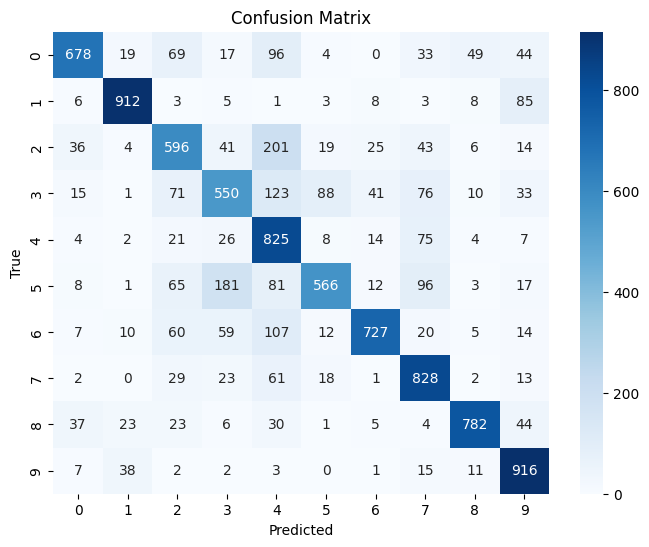

In [134]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Get all predictions and true labels
all_preds = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in aug_val_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Classification report
print("Classification Report:")
print(classification_report(all_labels, all_preds))

# Confusion matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### ROC Curve, AUC Score, and Threshold Selection for Complex CNN
Plot ROC curves and calculate AUC for each class. Also, show how to adjust the threshold for a specific class.

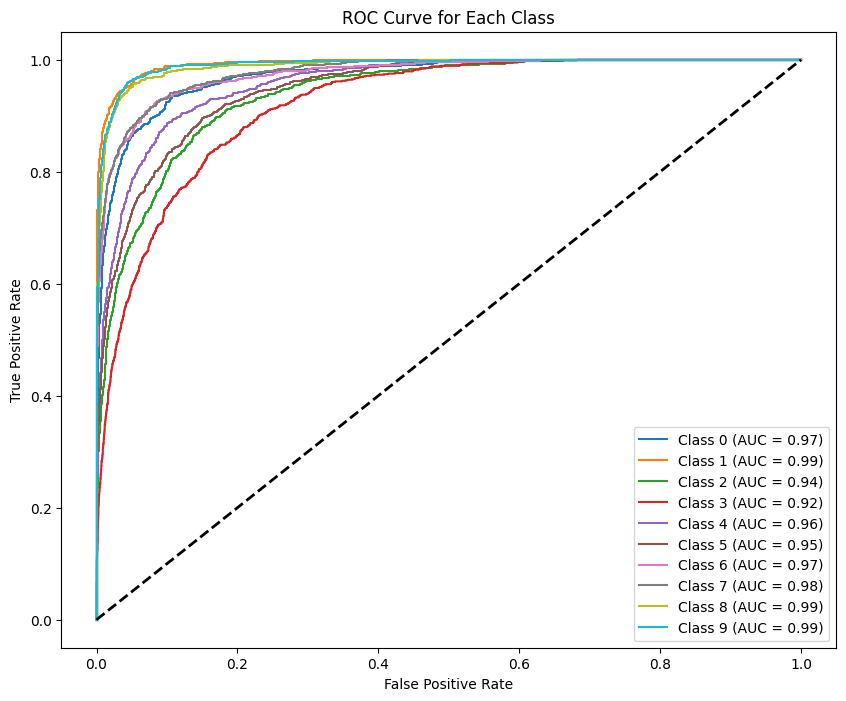

Macro-average AUC: 0.9662
Micro-average AUC: 0.9676
Best threshold for class 0: 0.043 (Youden's J statistic)


In [135]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# Get model predictions (probabilities) and true labels
all_probs = []
all_labels = []
model.eval()
with torch.no_grad():
    for images, labels in aug_val_loader:
        outputs = model(images)
        probs = torch.softmax(outputs, dim=1)
        all_probs.append(probs.cpu().numpy())
        all_labels.append(labels.cpu().numpy())
all_probs = np.concatenate(all_probs, axis=0)
all_labels = np.concatenate(all_labels, axis=0)

# Binarize the labels for multiclass ROC
n_classes = 10
all_labels_bin = label_binarize(all_labels, classes=np.arange(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Each Class')
plt.legend(loc='lower right')
plt.show()

# Calculate macro and micro average AUC
roc_auc_macro = roc_auc_score(all_labels_bin, all_probs, average='macro', multi_class='ovr')
roc_auc_micro = roc_auc_score(all_labels_bin, all_probs, average='micro', multi_class='ovr')
print(f"Macro-average AUC: {roc_auc_macro:.4f}")
print(f"Micro-average AUC: {roc_auc_micro:.4f}")

# Example: Adjust threshold for class 0
class_idx = 0
fpr0, tpr0, thresholds0 = roc_curve(all_labels_bin[:, class_idx], all_probs[:, class_idx])
# Find threshold closest to TPR - FPR = max (Youden's J statistic)
j_scores = tpr0 - fpr0
best_idx = np.argmax(j_scores)
best_threshold = thresholds0[best_idx]
print(f"Best threshold for class 0: {best_threshold:.3f} (Youden's J statistic)")

- The ROC curve and AUC are plotted for each class.
- Macro and micro average AUC scores are printed.
- The best threshold for class 0 (using Youden's J statistic) is shown. You can adjust the threshold for other classes similarly.

J = True Positive Rate (TPR) - False Positive Rate (FPR)

How is it taken?

For each possible threshold, you calculate TPR and FPR.

You compute J = TPR - FPR for each threshold.

The threshold with the highest J value is considered optimal, as it maximizes the difference between true positive rate and false positive rate.

########################################################################################

Auc is 0.96 is great Because of Low False Positive Rate so its reduce false Alaram

####################################################################################

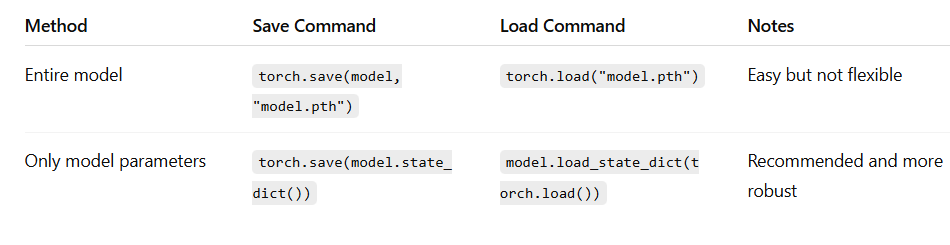

Future Prediction Using - Load Entire Model ( Option 1 )

## Load the Entire Saved Model for Prediction
You can load the entire model (architecture + weights) using torch.load if you saved it with torch.save(model, ...).

Option 1: Load only the weights (recommended and safest)

✅ Solution 1 (Safe Way — Only if You Trust the Model File)
Use the weights_only=False flag explicitly, like this:

This tells PyTorch to trust the file and load the full model (including custom classes).

✅ Use this only if:

You saved this model yourself.

You trust the source 100%.



In [11]:
import torch

# Load the entire model
model = torch.load('complex_cnn_model.pth', weights_only=False)
model.eval()

ComplexCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

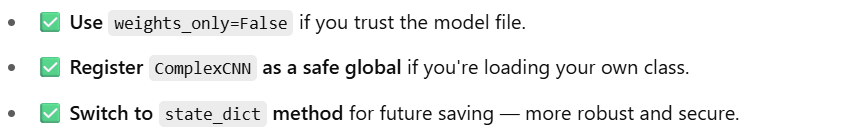

Prediction

🧠 Step 1: Preprocess the Input

Assuming your model takes grayscale images (1 channel) — typical for MNIST-style data.

In [17]:
from PIL import Image
import torchvision.transforms as transforms

# Load image (example: 32x32 grayscale)
img = Image.open("airplane/aeroplane_s_000004.png").convert("L")  # 'L' = grayscale

# Resize, convert to tensor, normalize
transform = transforms.Compose([
    transforms.Resize((32, 32)),             # if needed
    transforms.ToTensor(),                   # Convert [0,255] → [0,1]
    transforms.Normalize((0.5,), (0.5,))      # Normalize to [-1, 1]
])

input_tensor = transform(img)  # Shape: [1,32,32]
input_tensor = input_tensor.unsqueeze(0)  # Add batch dim → [1, 1, 32, 32]


⚙️ Step 2: Prediction

In [18]:
with torch.no_grad():  # No gradient computation
    output = model(input_tensor)  # Forward pass
    _, predicted_class = torch.max(output, 1)  # Get class with highest score

print(f"Predicted class: {predicted_class.item()}")


Predicted class: 0


#######################################################################################

## Load Only Model Parameters (Recommended)
Define the model architecture, then load the saved state_dict.

🔹 Step 1: Define the model architecture

You must define the same architecture as the one used during training.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class ComplexCNN(nn.Module):
    def __init__(self):
        super(ComplexCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2)
        self.dropout = nn.Dropout(0.3)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)  # Assuming input is 28x28
        self.fc2 = nn.Linear(256, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.bn1(self.conv1(x)))
        x = self.pool(x)
        x = self.relu(self.bn2(self.conv2(x)))
        x = self.pool(x)
        x = self.relu(self.bn3(self.conv3(x)))
        x = self.pool(x)
        x = x.view(x.size(0), -1)  # Flatten
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.dropout(self.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


🔹 Step 2: Load the state_dict


In [20]:
model = ComplexCNN()
model.load_state_dict(torch.load("complex_cnn_model_state_dict.pth"))
model.eval()

ComplexCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

🔹 Step 3: Prediction (same as before)

In [22]:
from PIL import Image
import torchvision.transforms as transforms

img = Image.open("automobile/ambulance_s_000101.png").convert("L")

transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

input_tensor = transform(img).unsqueeze(0)

with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)

print(f"Predicted class: {predicted.item()}")


Predicted class: 1


- Both methods will allow you to make predictions.
- Loading only the model parameters (option 2) is recommended for most use cases.